In [17]:
import numpy as np
from scipy import stats
import scipy
from scipy.special import erf
import math

Проверка гипотез о значении среднего

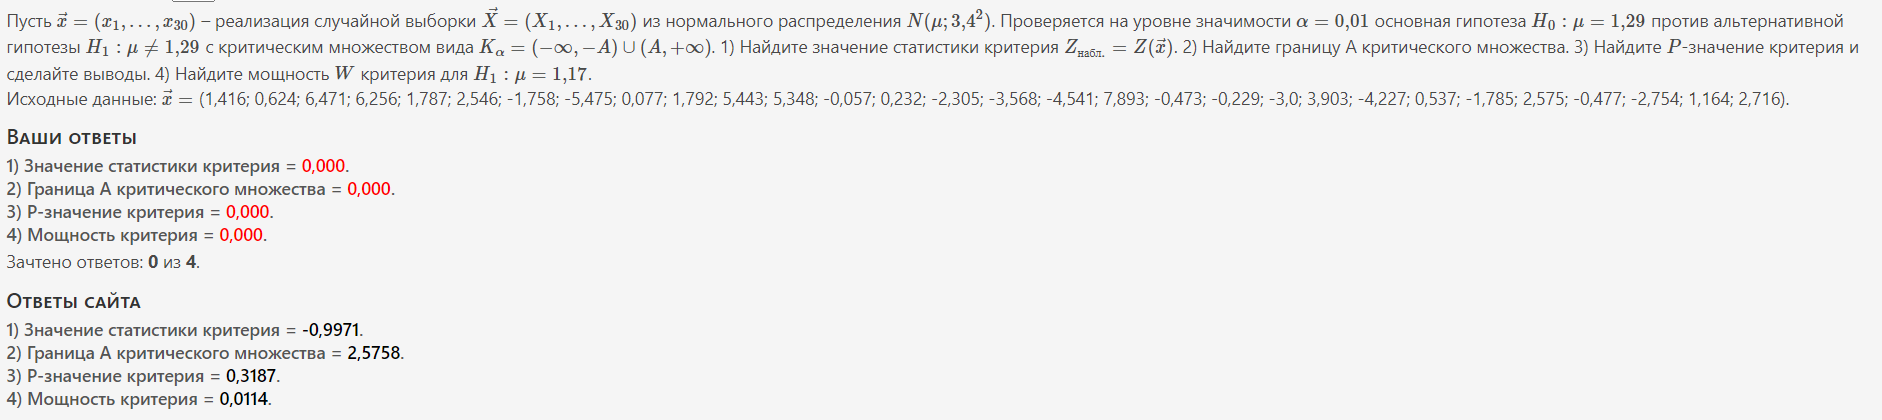

In [19]:
sigma = 3.5 
alpha = 0.03
mu0 = 1.84
mu1 = 1.66  # для мощности
x = '-3,586; 2,714; 9,393; -0,013; -1,157; 3,174; 0,74; 8,182; 1,053; 2,192; 1,441; -1,332; 6,073; -5,954; 2,213; 2,572; 6,021; 1,238; -3,59; -3,227; -5,831; -4,166; 3,279; 4,537; 1,014'


x = [float(i.replace(',', '.')) for i in x.split(';')]
n = len(x)
ex = np.mean(x)
z = (n)**0.5*(ex-mu0)/sigma
A = stats.norm.isf(alpha/2)
pv = 2*(1 - scipy.stats.norm.cdf(abs(z)))
laplace = lambda x: erf(x/2**0.5)/2
delta = np.sqrt(n)*(mu0-mu1)/sigma
power = 1 - (laplace(A + delta) + laplace(A - delta))

z = str(round(z,5)).replace('.', ',')
#A = str(round(A,5)).replace('.', ',')
pv = str(round(pv,5)).replace('.', ',')
power = str(round(power,5)).replace('.', ',')

print('Значение статистики критерия:', z)
print('Граница А критического множества:', A)
print('P-значение критерия:', pv)
print('Мощность критерия:', power)

Значение статистики критерия: -1,08686
Граница А критического множества: 2.1700903775845606
P-значение критерия: 0,2771
Мощность критерия: 0,03548


In [ ]:
(laplace(A + delta) + laplace(A - delta))

0.9645153787695507

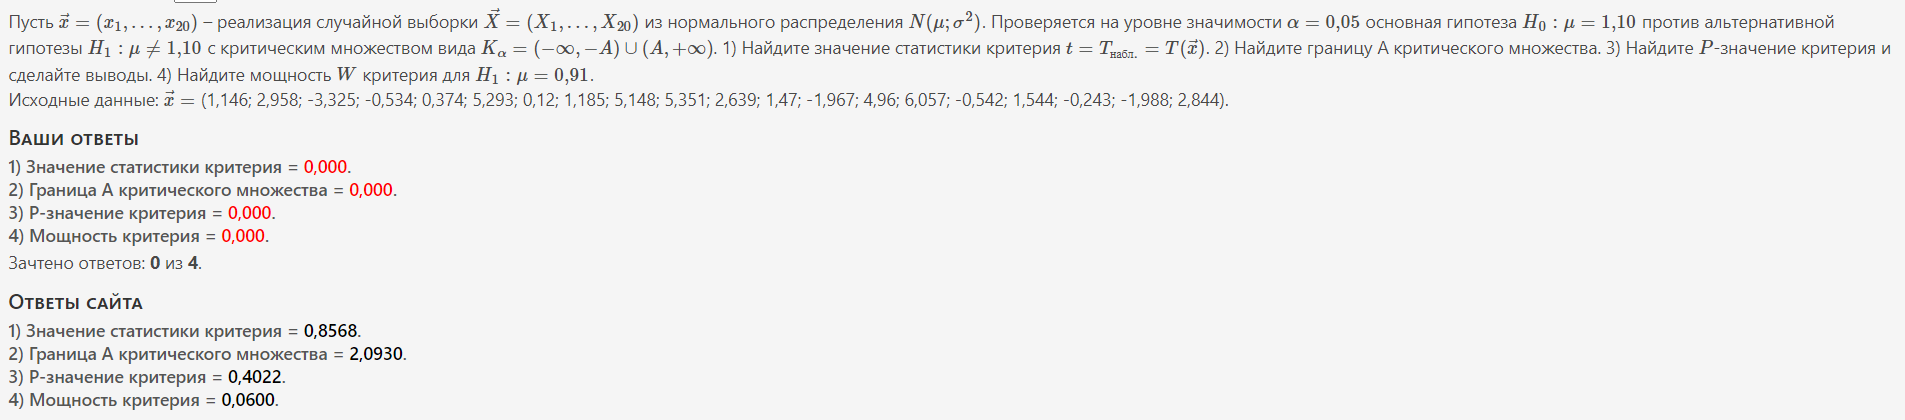

In [ ]:
alpha = 0.03
mu0 = 1.6
mu1 = 1.48  # для мощности 
x = '4,032; 2,791; 5,229; 2,223; 4,47; 1,632; 3,026; 4,957; -0,1; 3,993; 5,355; -5,752; 0,155; -2,071; 2,322; -2,248; -2,003; 5,011; 6,819; 0,203; 4,51; 0,799; 4,328; 2,549; -0,261; 8,059; -0,048; 6,468; -2,337; 4,309'


x = [float(i.replace(',', '.')) for i in x.split(';')]
n = len(x)
ex = np.mean(x)
s2 = 1/(n-1) * sum((i-ex)**2 for i in x)
t = (ex - mu0)/s2**0.5 * n**0.5 
A = stats.t.isf(alpha/2, n-1)
pv = 2 * min(stats.t.sf(t, n-1), stats.t.cdf(t, n-1))
delta = np.sqrt(n) * (mu1 - mu0)/np.sqrt(s2)
power = 1 - (stats.nct.cdf(A, n-1, delta) - stats.nct.cdf(-A, n-1, delta) )

t = str(round(t,5)).replace('.', ',')
A = str(round(A,5)).replace('.', ',')
pv = str(round(pv,5)).replace('.', ',')
power = str(round(power,5)).replace('.', ',')

print('Значение статистики критерия:', t)
print('Граница А критического множества:', A)
print('P-значение критерия:', pv)
print('Мощность критерия:', power)

Значение статистики критерия: 1,15551
Граница А критического множества: 2,28217
P-значение критерия: 0,25731
Мощность критерия: 0,03316


Проверка гипотез о значении дисперсии

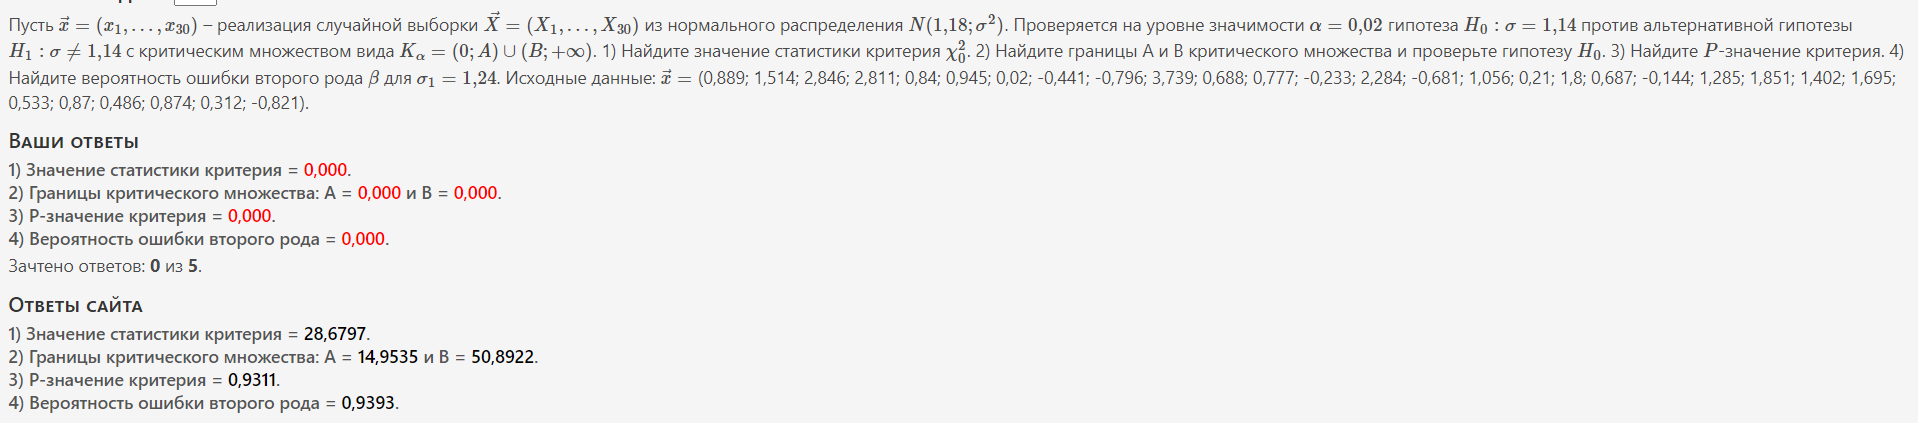

In [ ]:
mu = 1.18
alpha = 0.02
sigma = 1.14
sigma1 = 1.24
x = '0,889; 1,514; 2,846; 2,811; 0,84; 0,945; 0,02; -0,441; -0,796; 3,739; 0,688; 0,777; -0,233; 2,284; -0,681; 1,056; 0,21; 1,8; 0,687; -0,144; 1,285; 1,851; 1,402; 1,695; 0,533; 0,87; 0,486; 0,874; 0,312; -0,821'



x = [float(i.replace(',', '.')) for i in x.split(';')]
n = len(x)
chi = 1/sigma**2 * sum((i-mu)**2 for i in x)
X = stats.chi2(len(x))
A = X.isf(1-alpha/2)
B = X.isf(alpha/2)
pv = 2*X.cdf(chi)
# вероятность ошибки второго рода?

0.9655348191398445

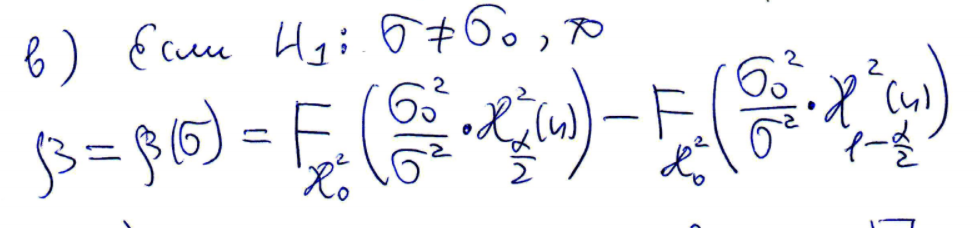

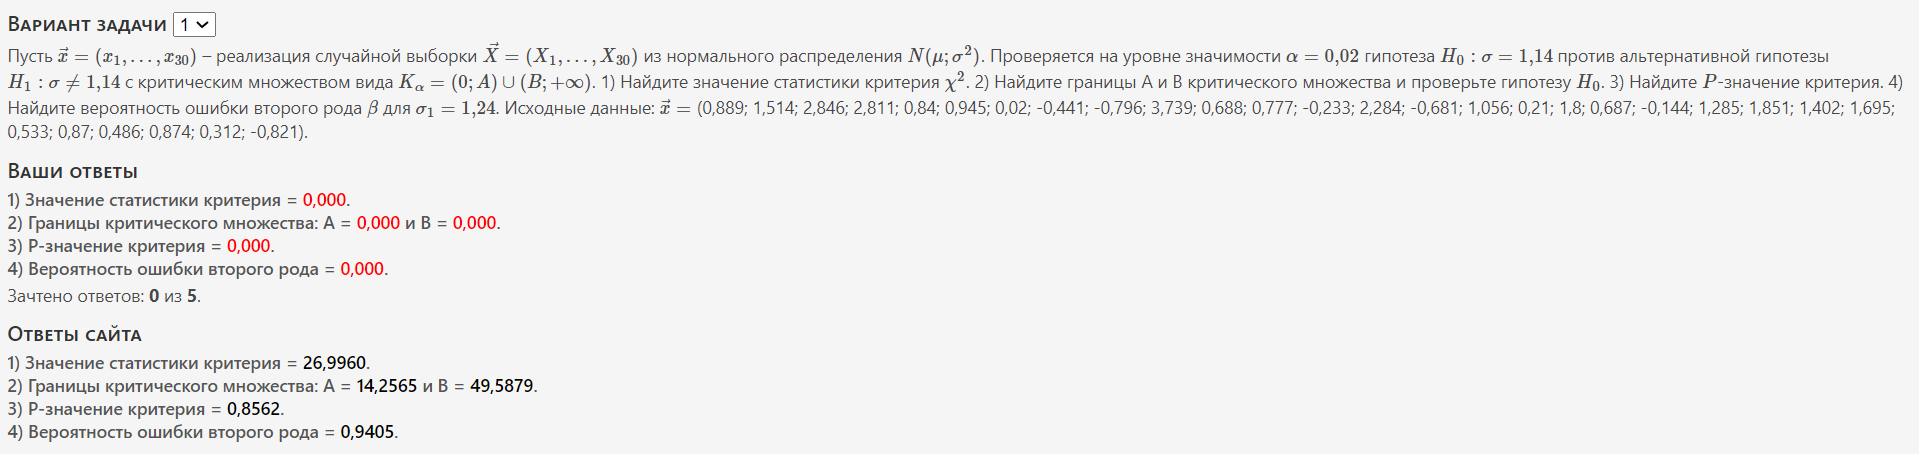

In [ ]:
alpha = 0.02
sigma = 1.14
sigma1 = 1.24
x = '0,889; 1,514; 2,846; 2,811; 0,84; 0,945; 0,02; -0,441; -0,796; 3,739; 0,688; 0,777; -0,233; 2,284; -0,681; 1,056; 0,21; 1,8; 0,687; -0,144; 1,285; 1,851; 1,402; 1,695; 0,533; 0,87; 0,486; 0,874; 0,312; -0,821'



x = [float(i.replace(',', '.')) for i in x.split(';')]
n = len(x)
chi = 1/sigma**2 * sum((i-np.mean(x))**2 for i in x)
X = stats.chi2(len(x)-1)
A = X.isf(1-alpha/2)
B = X.isf(alpha/2)
pv = 2*X.cdf(chi)  # Ошибка
# вероятность ошибки второго рода?


0.8561628289353819

Проверка гипотез о равенстве двух средних

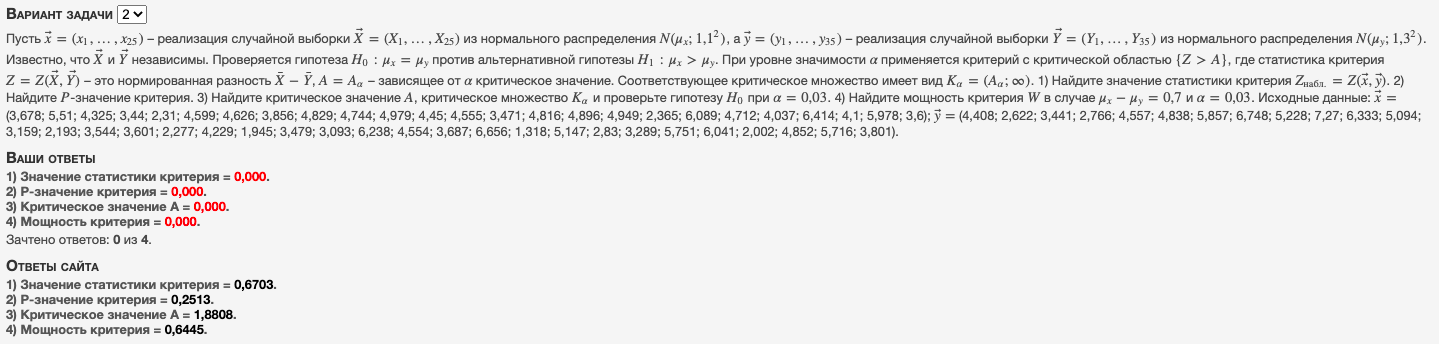

In [ ]:
W = 1 - Z.cdf(Z.isf(alpha) - np.sqrt(n*m)/np.sqrt(n*sigma_1 + m*sigma_2)*delta)

sigma_1 = 1.1**2
sigma_2 = 1.3**2

alpha = 0.03
delta = 0.7

data_x = '3,678; 5,51; 4,325; 3,44; 2,31; 4,599; 4,626; 3,856; 4,829; 4,744; 4,979; 4,45; 4,555; 3,471; 4,816; 4,896; 4,949; 2,365; 6,089; 4,712; 4,037; 6,414; 4,1; 5,978; 3,6'
data_x = data_x.replace(',','.')
data_x = data_x.replace(';',',')
data_x = np.array(list(map(lambda x: float(x),data_x.split(', '))))

data_y = '4,408; 2,622; 3,441; 2,766; 4,557; 4,838; 5,857; 6,748; 5,228; 7,27; 6,333; 5,094; 3,159; 2,193; 3,544; 3,601; 2,277; 4,229; 1,945; 3,479; 3,093; 6,238; 4,554; 3,687; 6,656; 1,318; 5,147; 2,83; 3,289; 5,751; 6,041; 2,002; 4,852; 5,716; 3,801'
data_y = data_y.replace(',','.')
data_y = data_y.replace(';',',')
data_y = np.array(list(map(lambda x: float(x),data_y.split(', '))))

Z = stats.norm()
m = len(data_x)
n = len(data_y)

z_nabl = (np.mean(data_x) - np.mean(data_y)) / np.sqrt( sigma_1/m + sigma_2/n )
print('статистика критерия Zнабл = ', round(z_nabl, 4))

print('p-value =',round(Z.sf(z_nabl), 4))

print('Значение критической области А =',round(Z.isf(alpha), 4))

W = 1 - Z.cdf(Z.isf(alpha) - np.sqrt(n*m)/np.sqrt(n*sigma_1 + m*sigma_2)*delta)

print('мощность критерия =',round(W, 5))

статистика критерия Zнабл =  0.6703
p-value = 0.2513
Значение критической области А = 1.8808
мощность критерия = 0.64447


Проверка гипотез о трех средних

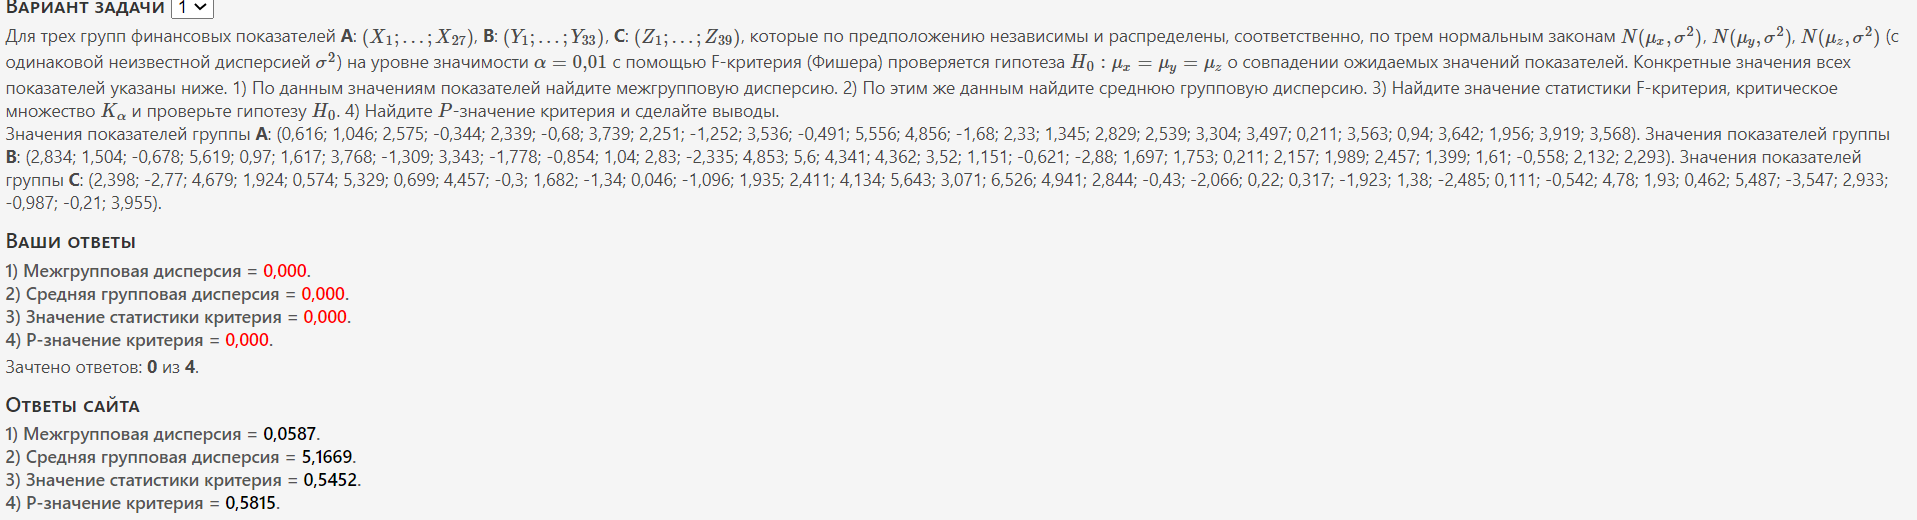

In [ ]:
alpha = 0.03
data_a = '3,956; 0,338; -0,582; 3,536; -0,028; 0,245; 0,807; 1,942; 1,05; -1,4; 0,355; -3,436; 3,401; -1,945; -0,751; 2,025; 0,125; 5,603; -1,203; 2,541; 1,806; -0,903; 3,156; 1,488; 3,752; 3,876; 7,092'
data_a = data_a.replace(',','.')
data_a = data_a.replace(';',',')
data_a = list(map(lambda x: float(x),data_a.split(', ')))

data_b = '5,108; 1,014; 1,325; 4,539; 3,473; 3,436; -1,981; 1,842; 0,129; 2,572; 1,664; 4,084; 2,661; 3,787; 0,781; -0,367; 0,916; 1,859; 2,81; 7,322; 1,799; -0,394; 1,07; 0,787; 3,056; -1,798; 2,052; 2,276; 2,457; 0,466; 1,329; -1,518; 0,716'
data_b = data_b.replace(',','.')
data_b = data_b.replace(';',',')
data_b = list(map(lambda x: float(x),data_b.split(', ')))

data_c = '0,597; 2,899; -0,875; 3,775; 5,487; -3,068; 2,923; 3,525; 0,37; 0,947; 1,581; 1,185; 1,158; -2,122; 4,666; 4,491; -0,052; -1,619; 3,151'
data_c = data_c.replace(',','.')
data_c = data_c.replace(';',',')
data_c = list(map(lambda x: float(x),data_c.split(', ')))

F = stats.norm()
a = len(data_a)
b = len(data_b)
c = len(data_c)
n = a+b+c

k = data_a + data_b + data_c
s_m = (np.mean(data_a) - np.mean(k))**2/n*a + (np.mean(data_b) - np.mean(k))**2/n*b + (np.mean(data_c) - np.mean(k))**2/n*c
print('Межгрупповая дисперсия  = ', round(s_m, 4))

s =  sum((data_a-np.mean(data_a))**2)/n+sum((data_c-np.mean(data_c))**2)/n+sum((data_b-np.mean(data_b))**2)/n
print('Средняя групповая дисперсия  = ', round(s, 4))

f = f_oneway(data_a,data_b,data_c)[0]
print('Значение статистики критерия  = ', round(f, 4))

f_pv = f_oneway(data_a,data_b,data_c)[1]
print('p-value  = ', round(f_pv, 4))

Доверительный интервал для коэфф. к

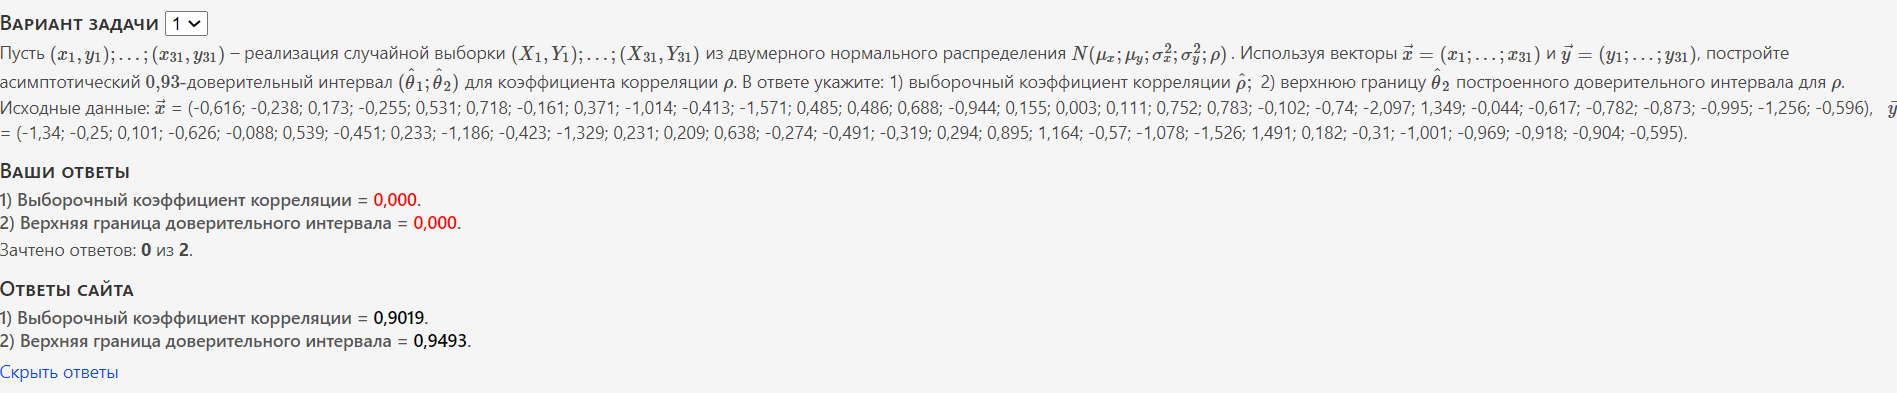

In [ ]:
x = '-0,616; -0,238; 0,173; -0,255; 0,531; 0,718; -0,161; 0,371; -1,014; -0,413; -1,571; 0,485; 0,486; 0,688; -0,944; 0,155; 0,003; 0,111; 0,752; 0,783; -0,102; -0,74; -2,097; 1,349; -0,044; -0,617; -0,782; -0,873; -0,995; -1,256; -0,596'
y = '-1,34; -0,25; 0,101; -0,626; -0,088; 0,539; -0,451; 0,233; -1,186; -0,423; -1,329; 0,231; 0,209; 0,638; -0,274; -0,491; -0,319; 0,294; 0,895; 1,164; -0,57; -1,078; -1,526; 1,491; 0,182; -0,31; -1,001; -0,969; -0,918; -0,904; -0,595'
j = 0.93


# решено
import math
x = [float(i.replace(',', '.')) for i in x.split(';')]
y = [float(i.replace(',', '.')) for i in y.split(';')]

p = np.corrcoef(x,y)[0][1]
z = stats.norm.isf((1-j)/2)
high = math.tanh(math.atanh(p) + 1/(len(x)-3)**0.5 * z)

p = str(p).replace('.', ',')
high = str(high).replace('.', ',')
print(f'Выборочный к кор: {p}')
print(f'Верхняя граница: {high}')

Выборочный к кор: 0,9019284075056879
Верхняя граница: 0,949322924119949


In [ ]:
p, z, high

(0.9019284075056879, 1.8119106729525982, 0.949322924119949)